In [1]:
import pandas as pd
import math
from collections import Counter

# 9.1 Writing Grades to a Plain Text File
user_entered_grades = input("Enter grades separated by a space\n").split()
try:
  with open('grades.txt', mode='w') as grades:
    for grade in user_entered_grades:
      grades.write(f'{grade}\n')
except:
  print("An error happened")

Enter grades separated by a space
94 94 95 86


In [2]:
# 9.2 Reading grades.txt file
try:
  with open('grades.txt', mode='r') as grades:
    grades_list = [float(grade.rstrip('\n')) for grade in grades]
    print(f'total of grades: ', sum(grades_list))
    print(f'Average grade: {sum(grades_list) / len(grades_list):.2f}')
    print(f'Frequency count: {Counter(grades_list)}')
except ValueError:
  print('Improper grade entered. Enter a numerical value')


total of grades:  369.0
Average grade: 92.25
Frequency count: Counter({94.0: 2, 95.0: 1, 86.0: 1})


In [3]:
# Q3 writing to csv
import csv

def write_grades():
  with open('grades.csv', mode='a', newline='') as file:
    writer = csv.writer(file)
    # collect first name
    while True:
      first_name = input("Enter student's first name (exit to quit): ")
      if first_name.lower() == 'exit':
        break
      last_name = input("Enter student's last name: ")

      try:
        grade1 = int(input("Enter grade for first exam: "))
        grade2 = int(input("Enter grade for second exam: "))
        grade3 = int(input("Enter grade for third exam: "))
      except ValueError:
        print("Invalid grade. Should be numerical")
        continue

      writer.writerow([first_name, last_name, grade1, grade2, grade3])
      print(f'Exame for {first_name} written to csv\n')

write_grades()


Enter student's first name (exit to quit): Dude
Enter student's last name: Smith
Enter grade for first exam: 94
Enter grade for second exam: 95
Enter grade for third exam: 90
Exame for Dude written to csv

Enter student's first name (exit to quit): Jackson
Enter student's last name: Miss
Enter grade for first exam: 85
Enter grade for second exam: 76
Enter grade for third exam: 86
Exame for Jackson written to csv

Enter student's first name (exit to quit): exit


In [5]:
# reading from csv file
def read_grades():
    try:
        # Open the CSV file in read mode
        with open('grades.csv', mode='r') as file:
            reader = csv.reader(file)

            # Print the header for the table
            # ljust to justify
            print(f"{'First Name'.ljust(15)}{'Last Name'.ljust(15)}{'Exam 1'.ljust(10)}{'Exam 2'.ljust(10)}{'Exam 3'.ljust(10)}")
            print("-" * 60)  # Separator

            # Loop through each row in the file and display it
            for row in reader:
                # Extract each element of the row and format it into columns
                first_name, last_name, grade1, grade2, grade3 = row
                print(f"{first_name.ljust(15)}{last_name.ljust(15)}{grade1.ljust(10)}{grade2.ljust(10)}{grade3.ljust(10)}")

    except FileNotFoundError:
        print("The file 'grades.csv' does not exist. Please make sure to create and populate the file first.")

read_grades()

First Name     Last Name      Exam 1    Exam 2    Exam 3    
------------------------------------------------------------
Dude           Smith          94        95        90        
Jackson        Miss           85        76        86        


In [12]:
# reading from csv file
def read_grades_averages():
    try:
        # Open the CSV file in read mode
        with open('grades.csv', mode='r') as file:
            reader = csv.reader(file)

            # Print the header for the table
            # ljust to justify
            print(f"{'First Name'.ljust(15)}{'Last Name'.ljust(15)}{'Exam 1'.ljust(10)}{'Exam 2'.ljust(10)}{'Exam 3'.ljust(10)}{'Average'.ljust(10)}")
            print("-" * 70)  # Separator

            # Loop through each row in the file and display it
            total_students = 0
            total_exam1 = 0
            total_exam2 = 0
            total_exam3 = 0
            for row in reader:
                # Extract each element of the row and format it into columns
                first_name, last_name, grade1, grade2, grade3 = row
                grade1 = int(grade1)
                grade2 = int(grade2)
                grade3 = int(grade3)

                # calc average of individual student
                student_average = (grade1 + grade2 + grade3) / 3

                # print out all the data
                print(f"{first_name.ljust(15)}{last_name.ljust(15)}{str(grade1).ljust(10)}{str(grade2).ljust(10)}{str(grade3).ljust(10)}{str(round(student_average, 2)).ljust(10)}")

                # gather totals
                total_exam1 += grade1
                total_exam2 += grade2
                total_exam3 += grade3
                total_students += 1

            # calc averages
            avg_exam1 = total_exam1 / total_students
            avg_exam2 = total_exam2 / total_students
            avg_exam3 = total_exam3 / total_students

            print("-" * 70)
            print(f"{'Class Average'.ljust(30)}{str(round(avg_exam1, 2)).ljust(10)}{str(round(avg_exam2, 2)).ljust(10)}{str(round(avg_exam3, 2)).ljust(10)}")

    except FileNotFoundError:
        print("The file 'grades.csv' does not exist. Please make sure to create and populate the file first.")

read_grades_averages()

First Name     Last Name      Exam 1    Exam 2    Exam 3    Average   
----------------------------------------------------------------------
Dude           Smith          94        95        90        93.0      
Jackson        Miss           85        76        86        82.33     
----------------------------------------------------------------------
Class Average                 89.5      85.5      88.0      


In [22]:
%ls



Activity1.ipynb   BL-Flickr-Images-Book.csv   diamonds.csv  Pumpkin_Seeds_Dataset.xlsx
activity-2.ipynb  dermatology_database_1.csv  olympics.csv  university_towns.txt


In [23]:
# 9.16
df = pd.read_csv('diamonds.csv', index_col=0)

In [28]:
# display first seven rows and last seven rows
df.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [29]:
# display last 7 rows
df.tail(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [30]:
# use DF method describe to calculate the descriptive stats for numerical columsn - carat, depth, table, price, x, y, and z
df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
# use Series method describe to calculate the descriptive stats for categorical data (text) columns cut, color, and clarity
# type(df['cut'])
print(df['cut'].describe())
print()
print(df['color'].describe())
print()
print(df['clarity'].describe())

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object


In [36]:
# unique category values
print(df['cut'].unique())
print()
print(df['color'].unique())
print()
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

['E' 'I' 'J' 'H' 'F' 'G' 'D']

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<ipython-input-40-5ee655183256>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

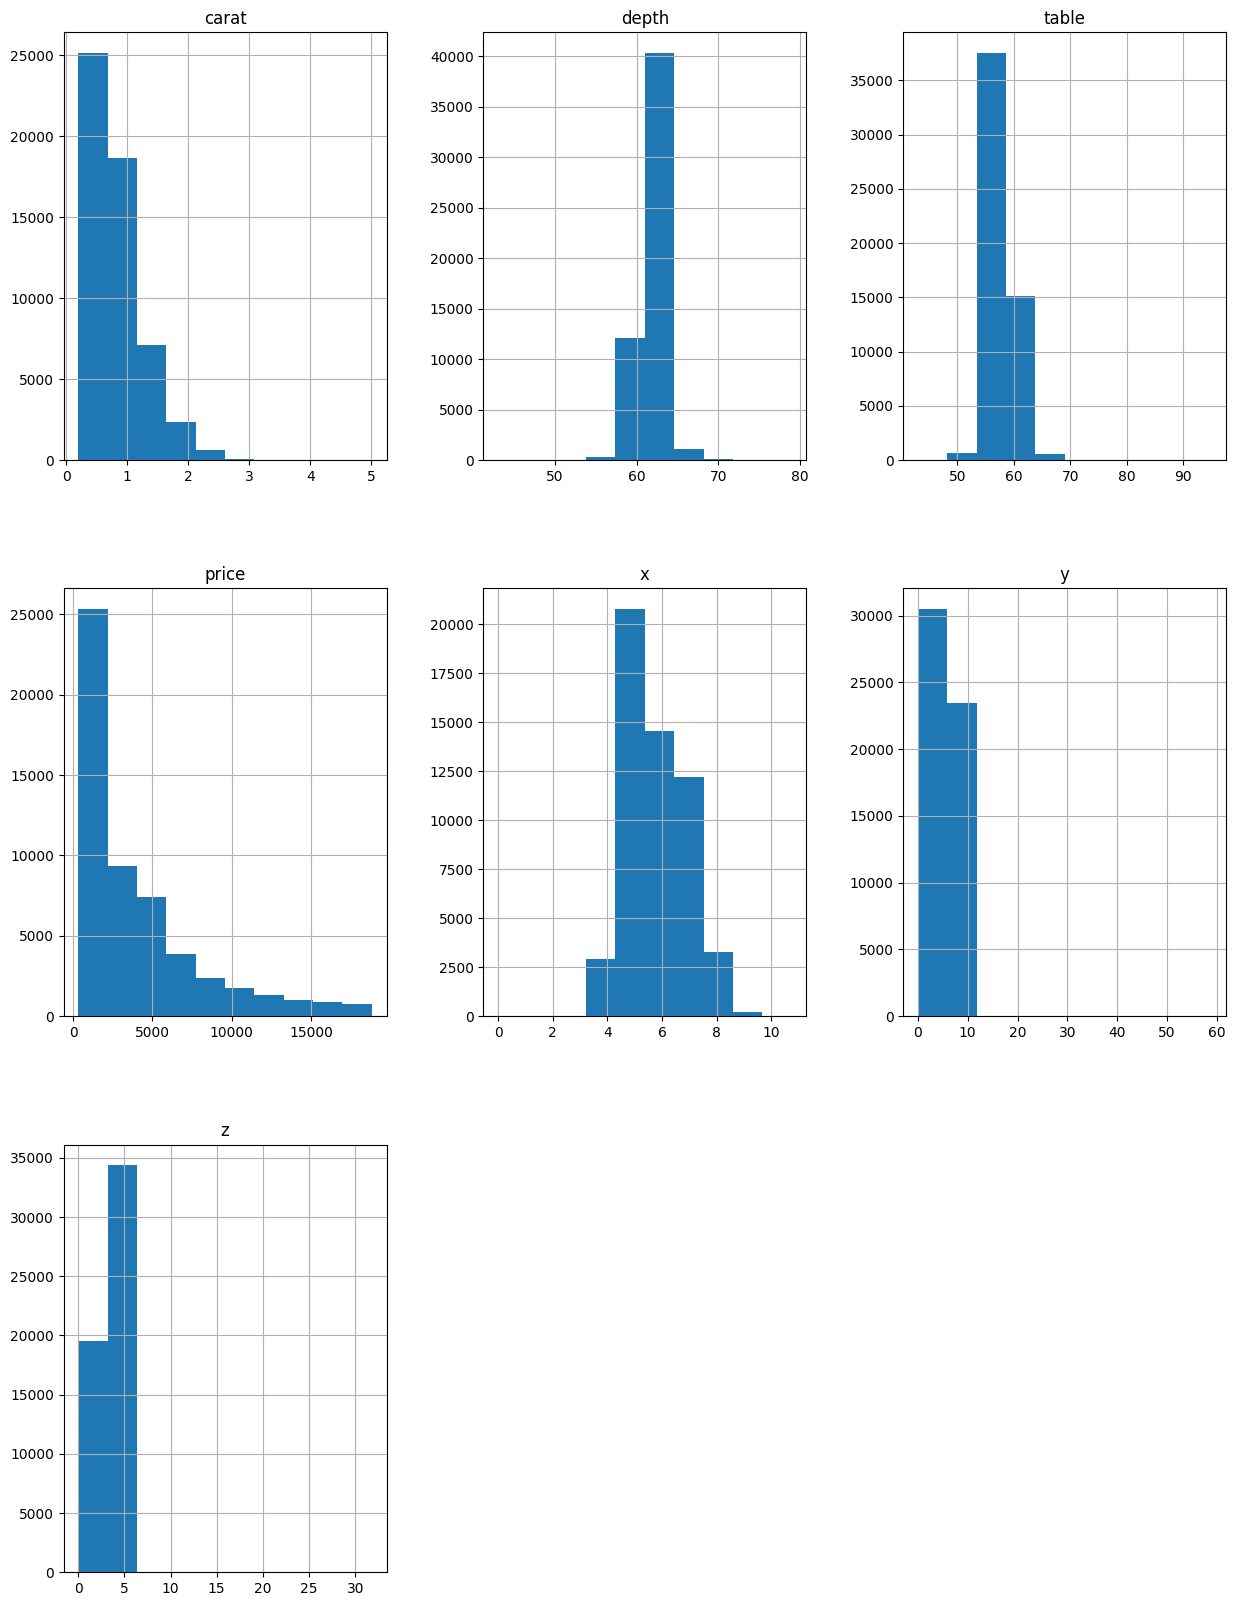

In [40]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(15,20))
ax = figure.gca()
df.hist(ax=ax)

In [41]:
# load iris
iris_df = pd.read_csv('Iris.csv', index_col=0)

In [42]:
# display iris head
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [43]:
# display iris tail
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
# describe some columns
iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-46-6cfc0f1de7fc>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  iris_df.hist(ax=ax)


array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

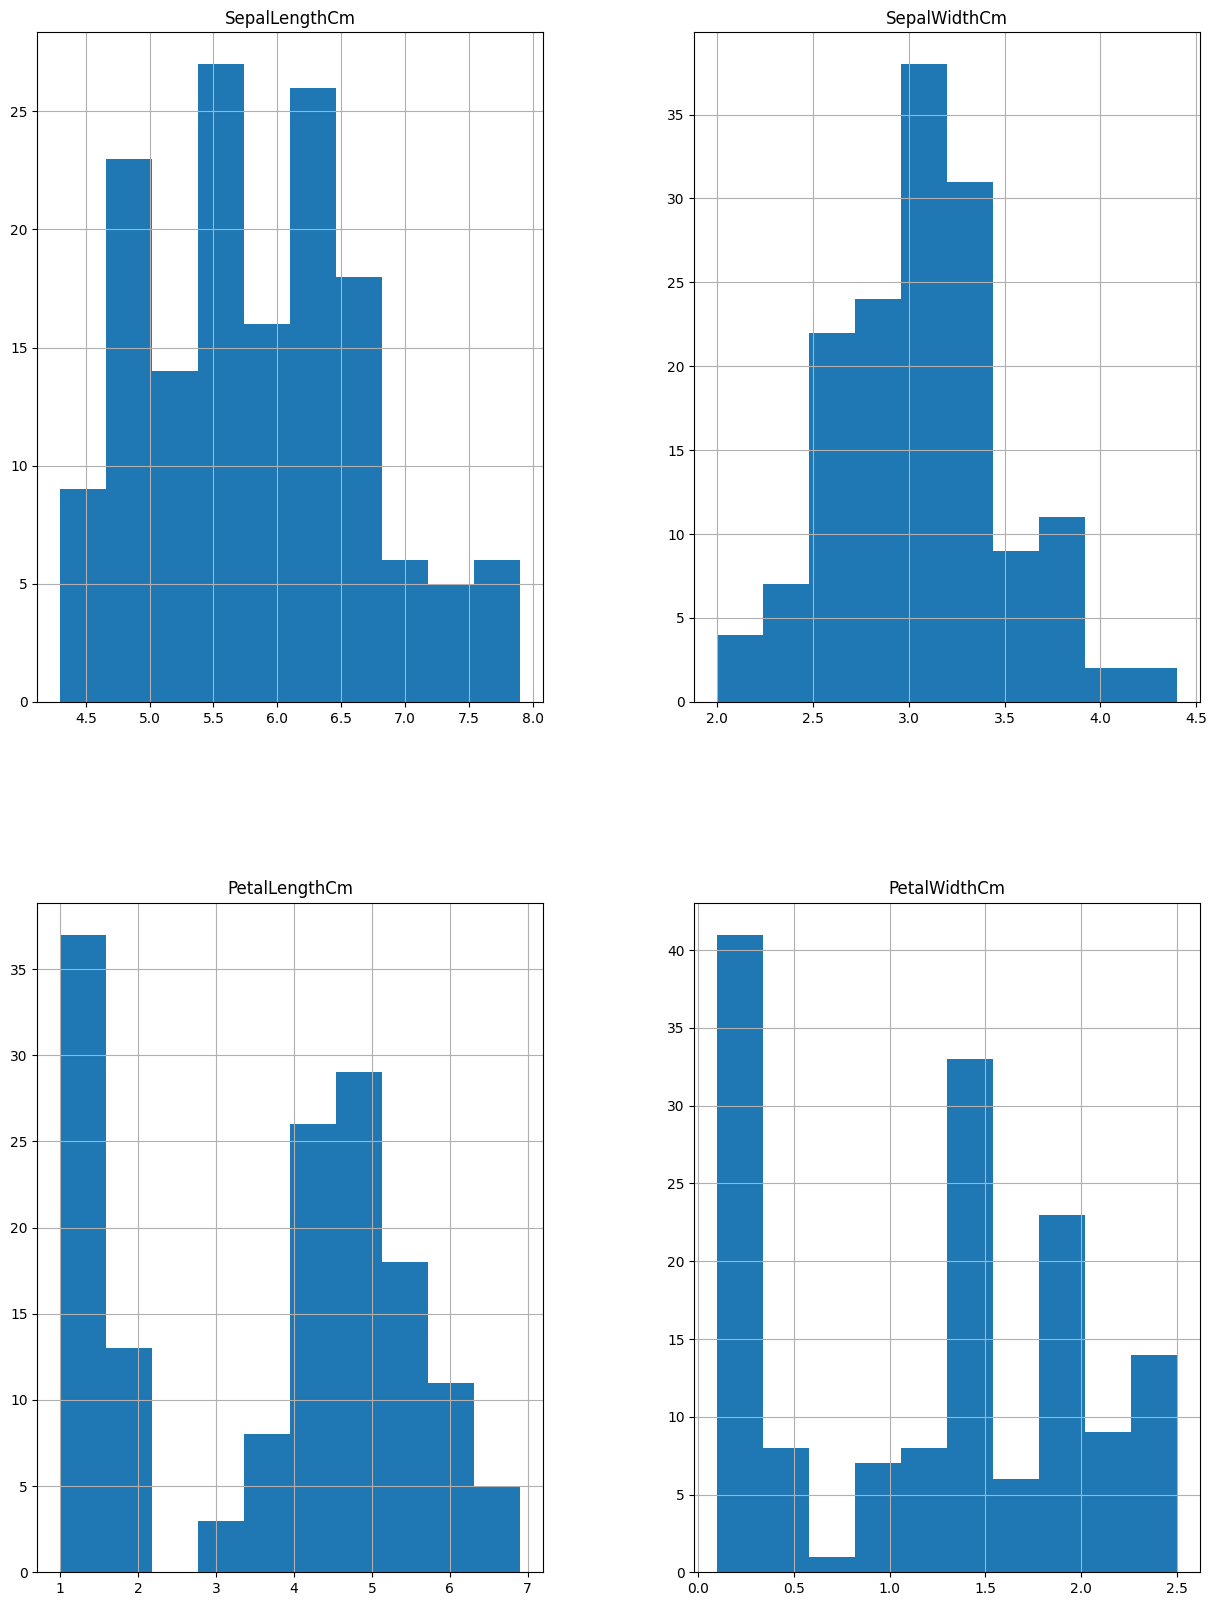

In [46]:
# display some data
figure = plt.figure(figsize=(15,20))
ax = figure.gca()
iris_df.hist(ax=ax)